In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import cv2
import random as rd
import skimage

In [2]:
from keras import layers
from keras import models
from keras.datasets import cifar10
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
BATCH_SIZE = 32 

EPOCHS = 10

COLORS = 3

In [5]:
from tensorflow import keras
from keras.layers import Dense, Conv2D
from keras.layers import BatchNormalization, Flatten, Dropout, MaxPooling2D, UpSampling2D
from keras.layers import RandomFlip, RandomHeight, RandomCrop, RandomRotation, RandomZoom, RandomWidth
from keras import Sequential
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy

In [6]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import optimizers

conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
# conv_base.summary()

In [7]:
model = Sequential([
    UpSampling2D((2,2)),
    UpSampling2D((2,2)),
    UpSampling2D((2,2)),
    conv_base,
    Flatten(),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(10, activation='softmax')
    ])

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='categorical_crossentropy', metrics=['acc'])

In [8]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_images,
                                                              train_labels,
                                                              test_size=0.15,
                                                              random_state=13
                                                              )
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((42500, 32, 32, 3), (7500, 32, 32, 3), (42500, 10), (7500, 10))

In [9]:
history = model.fit(train_X, train_label, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(valid_X, valid_label))

Epoch 1/10
1329/1329 [==============================] - 449s 320ms/step - loss: 1.5974 - acc: 0.4737 - val_loss: 0.7580 - val_acc: 0.7933
Epoch 2/10
1329/1329 [==============================] - 424s 319ms/step - loss: 0.9225 - acc: 0.7305 - val_loss: 0.4398 - val_acc: 0.8945
Epoch 3/10
1329/1329 [==============================] - 424s 319ms/step - loss: 0.6665 - acc: 0.8300 - val_loss: 0.3138 - val_acc: 0.9244
Epoch 4/10
1329/1329 [==============================] - 424s 319ms/step - loss: 0.5014 - acc: 0.8857 - val_loss: 0.2768 - val_acc: 0.9312
Epoch 5/10
1329/1329 [==============================] - 424s 319ms/step - loss: 0.3898 - acc: 0.9191 - val_loss: 0.2265 - val_acc: 0.9431
Epoch 6/10
1329/1329 [==============================] - 424s 319ms/step - loss: 0.3052 - acc: 0.9439 - val_loss: 0.2109 - val_acc: 0.9419
Epoch 7/10
1329/1329 [==============================] - 424s 319ms/step - loss: 0.2416 - acc: 0.9584 - val_loss: 0.2194 - val_acc: 0.9405
Epoch 8/10
1329/1329 [============

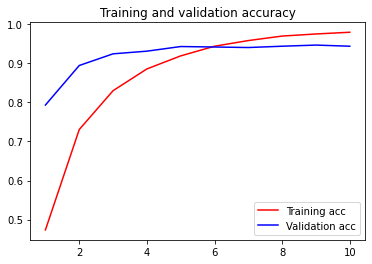

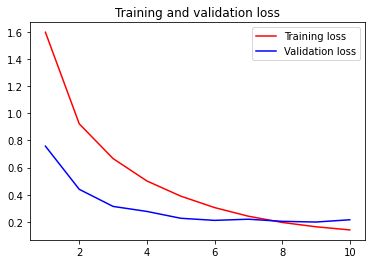

In [10]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

## Щойно навчена модель

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 26s 82ms/step - loss: 0.2252 - acc: 0.9408


313/313 [==============================] - 25s 76ms/step


[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

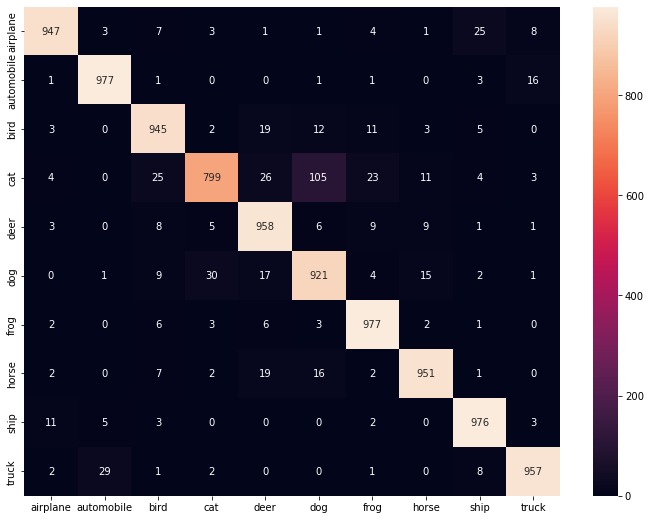

In [12]:
import seaborn as sns
import numpy as np
import tensorflow as tf
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Predict the values from the validation dataset
y_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors t_del
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(test_labels,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)

## Збереження моделі і вагів

In [13]:
model.save('model_from_Susana_v2.h5')
model.save_weights('weights_from_Susana_v2.h5')

## Тест завантаженої моделі

In [14]:
from keras.models import load_model

reload_model = load_model("C:/Users/kuzik/Desktop/project3/models/model_from_Susana_v2.h5")
reload_model.load_weights("C:/Users/kuzik/Desktop/project3/models/weights_from_Susana_v2.h5")

In [15]:
_, (test_x, test_y) = cifar10.load_data()

test_x = test_x.astype("float32") / 255
test_y = to_categorical(test_y)

reload_test_loss, reload_test_acc = reload_model.evaluate(test_x, test_y)

313/313 [==============================] - 27s 82ms/step - loss: 0.2252 - acc: 0.9408
